## Assignment 3

1. Go to the site here: https://psl.noaa.gov/data/climateindices/list/ and pick a climate index. You can use pandas or numpy to read in the data. Remember to read the documentation for it!

2. Using your data, build a composite map for the relevant "phases" or conditions (positive, negative, neutral) for your index.

3. Plot the differences against neutral conditions. If your index doesn't have a neutral condition, make a comparison between positive and negative phases in your index.

4. Use an appropriate statistical test for your data and mark the regions in your differences map where the differences are statistically significant using stippling, hatching, or transparency.



In [3]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

import datetime

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import warnings

In [4]:
file_path = '/home/istempko/nao.data'
df = pd.read_csv(file_path, sep=' ', skipinitialspace=True, header=None, index_col=0, na_values=-99.90)
df

,1,2,3,4,5,6,7,8,9,10,11,12
0,,,,,,,,,,,,
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,0.56,0.01,-0.78,0.65,-0.50,0.25,-1.23,-0.19,0.39,1.43,-1.46,-1.03
1951,-0.42,0.35,-1.47,-0.38,-0.50,-1.35,1.39,-0.41,-1.18,2.54,-0.54,1.13
1952,0.57,-1.38,-1.97,0.95,-0.99,-0.10,-0.06,-0.49,-0.38,-0.28,-1.32,-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1.05,0.98,0.66,-1.26,-0.33,0.16,-1.19,0.03,1.11,-0.20,2.54,-0.37
2021,-1.80,-0.29,0.36,-1.69,-1.10,1.08,0.06,-0.49,-0.06,-1.98,-0.33,0.18
2022,0.74,1.46,0.40,-0.54,0.71,0.19,-0.06,1.76,-1.42,-0.27,0.59,-0.22


In [5]:
df.columns = ['Jan', 'Feb', 'Mar', 'Apri', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df = df.rename_axis('Year')
df

,Jan,Feb,Mar,Apri,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,0.56,0.01,-0.78,0.65,-0.50,0.25,-1.23,-0.19,0.39,1.43,-1.46,-1.03
1951,-0.42,0.35,-1.47,-0.38,-0.50,-1.35,1.39,-0.41,-1.18,2.54,-0.54,1.13
1952,0.57,-1.38,-1.97,0.95,-0.99,-0.10,-0.06,-0.49,-0.38,-0.28,-1.32,-0.49
...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1.05,0.98,0.66,-1.26,-0.33,0.16,-1.19,0.03,1.11,-0.20,2.54,-0.37
2021,-1.80,-0.29,0.36,-1.69,-1.10,1.08,0.06,-0.49,-0.06,-1.98,-0.33,0.18
2022,0.74,1.46,0.40,-0.54,0.71,0.19,-0.06,1.76,-1.42,-0.27,0.59,-0.22


In [6]:
df['Mean'] = df.mean(axis=1)
df

,Jan,Feb,Mar,Apri,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mean
Year,,,,,,,,,,,,,
1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950,0.56,0.01,-0.78,0.65,-0.50,0.25,-1.23,-0.19,0.39,1.43,-1.46,-1.03,-0.158333
1951,-0.42,0.35,-1.47,-0.38,-0.50,-1.35,1.39,-0.41,-1.18,2.54,-0.54,1.13,-0.070000
1952,0.57,-1.38,-1.97,0.95,-0.99,-0.10,-0.06,-0.49,-0.38,-0.28,-1.32,-0.49,-0.495000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020,1.05,0.98,0.66,-1.26,-0.33,0.16,-1.19,0.03,1.11,-0.20,2.54,-0.37,0.265000
2021,-1.80,-0.29,0.36,-1.69,-1.10,1.08,0.06,-0.49,-0.06,-1.98,-0.33,0.18,-0.505000
2022,0.74,1.46,0.40,-0.54,0.71,0.19,-0.06,1.76,-1.42,-0.27,0.59,-0.22,0.278333


In [7]:
da_mean = xr.DataArray.from_series(df['Mean'])
da_mean

<xarray.DataArray 'Mean' (Year: 77)> Size: 616B
array([        nan,         nan, -0.15833333, -0.07      , -0.495     ,
       -0.09083333, -0.08583333, -0.5       , -0.17333333, -0.2425    ,
       -0.70333333,  0.28666667, -0.56      ,  0.01      , -0.38083333,
       -0.555     , -0.17833333, -0.21583333, -0.49      ,  0.34166667,
       -1.03916667, -0.18833333, -0.3525    , -0.0425    ,  0.4875    ,
       -0.15916667,  0.11166667, -0.16416667,  0.18416667, -0.415     ,
        0.275     ,  0.05333333, -0.54666667, -0.26666667,  0.36333333,
        0.29833333,  0.22833333, -0.28      ,  0.42916667, -0.2225    ,
       -0.07916667,  0.6775    ,  0.60666667,  0.25083333,  0.5375    ,
        0.155     ,  0.54166667, -0.09333333, -0.24916667, -0.20416667,
       -0.5425    ,  0.33083333,  0.15916667, -0.24166667,  0.00166667,
        0.02833333,  0.15666667, -0.31416667, -0.3125    ,  0.10583333,
       -0.4525    , -0.32333333, -1.28666667,  0.20416667, -0.53      ,
        0.1475    ,  0.0875    ,  0.39666667, -0.1175    ,  0.17333333,
        1.09333333, -0.39333333,  0.265     , -0.505     ,  0.27833333,
       -0.43583333, -0.022     ])
Coordinates:
  * Year     (Year) int64 616B 1948 1949 1950 1951 1952 ... 2021 2022 2023 2024

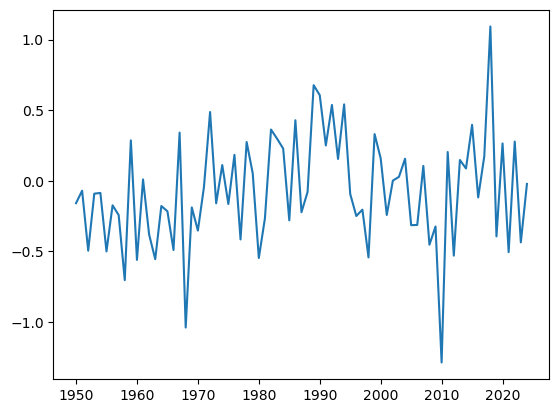

In [8]:
plt.plot(df['Mean'])

### Defining NAO Positive, Negative, and Neutral

In [9]:
nao_pos = da_mean.where(da_mean>=0.5)
nao_neg = da_mean.where(da_mean<=-0.5)
nao_neu = da_mean.where((da_mean>-0.5) & (df['Mean']<0.5))

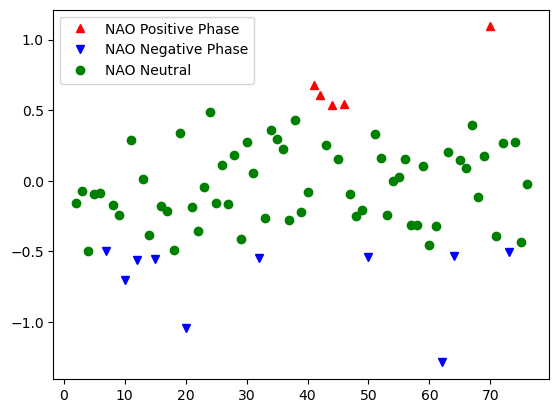

In [10]:
plt.plot(nao_pos, 'r^', linestyle='none', label='NAO Positive Phase')
plt.plot(nao_neg, 'bv', linestyle='none', label='NAO Negative Phase')
plt.plot(nao_neu, 'go', linestyle='none', label='NAO Neutral') ;

plt.legend()

### How many years do we have with NAO Positive, Neutral, and Negative?

In [11]:
print('NAO Positive: ', nao_pos.count(dim='Year').values)
print('NAO Neutral: ', nao_neu.count(dim='Year').values)
print('NAO Negative: ', nao_neg.count(dim='Year').values)

counts=[nao_pos.count(dim='Year').values,
        nao_neu.count(dim='Year').values,
        nao_neg.count(dim='Year').values]
print(counts)

NAO Positive:  5
NAO Neutral:  60
NAO Negative:  10
[array(5), array(60), array(10)]


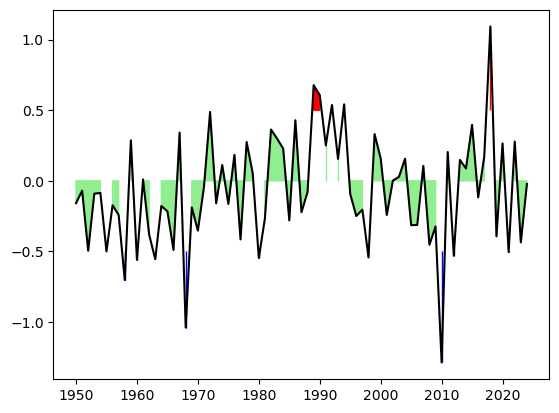

In [12]:
plt.plot(da_mean['Year'], da_mean, 'k')
plt.fill_between(da_mean['Year'].values, nao_pos, y2=0.5, color='red', label='Positive')
plt.fill_between(da_mean['Year'].values, nao_neu, color='lightgreen', label='Neutral')
plt.fill_between(da_mean['Year'].values, nao_neg, y2=-0.5, color='blue', label='Negative')

## Maximum Temperature Data

In [13]:
model_path = '/home/lortizur/clim680/project_data/'
model_file = 'era5_monthlymax_1985-2014.nc'
#openn file
ds_model = xr.open_dataset(model_path + model_file)
ds_model

<xarray.Dataset> Size: 1GB
Dimensions:      (time: 360, lat: 721, lon: 1440)
Coordinates:
    realization  int64 8B ...
  * lat          (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon          (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * time         (time) datetime64[ns] 3kB 1985-01-31 1985-02-28 ... 2014-12-31
Data variables:
    t2m          (time, lat, lon) float32 1GB ...
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2024-09-02T10:15 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

In [15]:
ds_climo = ds_model.groupby('time.month').mean()
ds_anoms = ds_model.groupby('time.month')-ds_climo
ds_anoms

<xarray.Dataset> Size: 1GB
Dimensions:      (time: 360, lat: 721, lon: 1440)
Coordinates:
    realization  (time) int64 3kB 0 0 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0 0
  * lat          (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon          (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * time         (time) datetime64[ns] 3kB 1985-01-31 1985-02-28 ... 2014-12-31
    month        (time) int64 3kB 1 2 3 4 5 6 7 8 9 10 ... 4 5 6 7 8 9 10 11 12
Data variables:
    t2m          (time, lat, lon) float32 1GB -4.11 -4.11 -4.11 ... 8.374 8.374

In [16]:
ds_anoms_yearly = ds_anoms.groupby('time.year').mean()
ds_anoms_yearly

<xarray.Dataset> Size: 125MB
Dimensions:  (year: 30, lat: 721, lon: 1440)
Coordinates:
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * year     (year) int64 240B 1985 1986 1987 1988 1989 ... 2011 2012 2013 2014
Data variables:
    t2m      (year, lat, lon) float32 125MB 0.8805 0.8805 0.8805 ... 2.229 2.229

In [17]:
da_anoms_yearly = ds_anoms_yearly.t2m.sel(year=slice(da_mean['Year'][36],da_mean['Year'][66]))
da_anoms_yearly

<xarray.DataArray 't2m' (year: 30, lat: 721, lon: 1440)> Size: 125MB
array([[[ 0.8805402 ,  0.8805402 ,  0.8805402 , ...,  0.8805402 ,
          0.8805402 ,  0.8805402 ],
        [ 0.9660441 ,  0.96514004,  0.96482086, ...,  0.96770984,
          0.96714276,  0.96663666],
        [ 1.0080134 ,  1.0085958 ,  1.009346  , ...,  1.0059866 ,
          1.0065422 ,  1.0070547 ],
        ...,
        [-0.44825616, -0.44810358, -0.44758987, ..., -0.45024744,
         -0.44975153, -0.44938532],
        [-0.19217937, -0.19211324, -0.19216156, ..., -0.19243877,
         -0.19204712, -0.19206493],
        [ 0.0581309 ,  0.0581309 ,  0.0581309 , ...,  0.0581309 ,
          0.0581309 ,  0.0581309 ]],

       [[ 0.8202222 ,  0.8202222 ,  0.8202222 , ...,  0.8202222 ,
          0.8202222 ,  0.8202222 ],
        [ 0.72216797,  0.72224045,  0.7228978 , ...,  0.7207413 ,
          0.7211507 ,  0.7216212 ],
        [ 0.32600275,  0.3275617 ,  0.32912573, ...,  0.32088342,
          0.32257843,  0.32455572],
...
        [ 0.6119232 ,  0.6128896 ,  0.6134033 , ...,  0.61025745,
          0.61075336,  0.61177063],
        [ 0.6311925 ,  0.6307704 ,  0.63104755, ...,  0.63162994,
          0.6315333 ,  0.63130695],
        [ 0.6807683 ,  0.6807683 ,  0.6807683 , ...,  0.6807683 ,
          0.6807683 ,  0.6807683 ]],

       [[ 0.05643972,  0.05643972,  0.05643972, ...,  0.05643972,
          0.05643972,  0.05643972],
        [ 0.27182388,  0.27157083,  0.2715772 , ...,  0.27202478,
          0.27194595,  0.27192816],
        [ 0.5638313 ,  0.5644137 ,  0.5645129 , ...,  0.56278104,
          0.56317395,  0.5635236 ],
        ...,
        [ 2.2494    ,  2.2490642 ,  2.2482758 , ...,  2.2506638 ,
          2.250183  ,  2.250061  ],
        [ 2.2801464 ,  2.2803752 ,  2.2800014 , ...,  2.2807007 ,
          2.2809296 ,  2.2805862 ],
        [ 2.2292378 ,  2.2292378 ,  2.2292378 , ...,  2.2292378 ,
          2.2292378 ,  2.2292378 ]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * year     (year) int64 240B 1985 1986 1987 1988 1989 ... 2011 2012 2013 2014

In [18]:
nao_pos.dropna(dim='Year')

<xarray.DataArray 'Mean' (Year: 5)> Size: 40B
array([0.6775    , 0.60666667, 0.5375    , 0.54166667, 1.09333333])
Coordinates:
  * Year     (Year) int64 40B 1989 1990 1992 1994 2018

In [19]:
#need to get 2 matching time series
nao_pos2 = nao_pos.sel(Year=slice(nao_pos['Year'][37],nao_pos['Year'][66]))
nao_neu2 = nao_neu.sel(Year=slice(nao_neu['Year'][37],nao_neu['Year'][66]))
nao_neg2 = nao_neg.sel(Year=slice(nao_neg['Year'][37],nao_neg['Year'][66]))

In [20]:
nao_pos_t2m = da_anoms_yearly.sel(year=nao_pos2.dropna(dim='Year')['Year']).mean(dim='Year')
nao_neu_t2m = da_anoms_yearly.sel(year=nao_neu2.dropna(dim='Year')['Year']).mean(dim='Year')
nao_neg_t2m = da_anoms_yearly.sel(year=nao_neg2.dropna(dim='Year')['Year']).mean(dim='Year')

comp_t2m = [nao_pos_t2m, nao_neu_t2m, nao_neg_t2m]
comp_t2m

[<xarray.DataArray 't2m' (lat: 721, lon: 1440)> Size: 4MB
 array([[-0.13753414, -0.13753414, -0.13753414, ..., -0.13753414,
         -0.13753414, -0.13753414],
        [-0.16546471, -0.16535154, -0.16522312, ..., -0.1658802 ,
         -0.16579026, -0.16556391],
        [-0.06874625, -0.06909497, -0.06944339, ..., -0.06783199,
         -0.0682122 , -0.06843217],
        ...,
        [ 0.42341164,  0.42323875,  0.42302006, ...,  0.42393553,
          0.4236177 ,  0.42345494],
        [ 0.46347746,  0.46331215,  0.46305653, ...,  0.4642315 ,
          0.4638538 ,  0.4637954 ],
        [ 0.46882915,  0.46882915,  0.46882915, ...,  0.46882915,
          0.46882915,  0.46882915]], dtype=float32)
 Coordinates:
   * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
   * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8,
 <xarray.DataArray 't2m' (lat: 721, lon: 1440)> Size: 4MB
 array([[ 0.16399635,  0.16399635,  0.16399635, ...,  0.16399635,
        

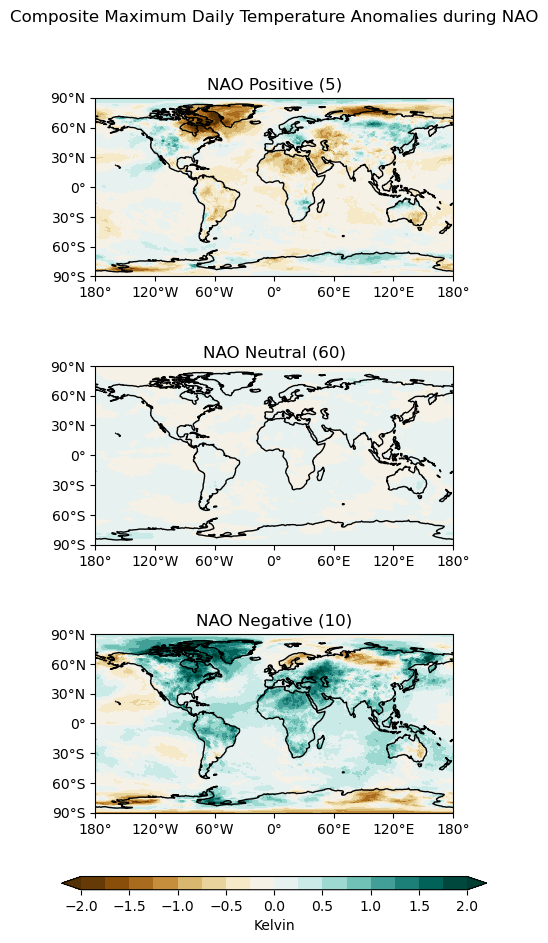

In [37]:
labels=['NAO Positive','NAO Neutral', 'NAO Negative']
clevs = np.arange(-2.0,2.1,0.25)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=3,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array (just 3 rows)
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,nao in enumerate(comp_t2m):

        # Select the season
        data = comp_t2m[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=comp_t2m[i]['lon'])

        # Contour plot
        cs=axs[i].contourf(lons,comp_t2m[i]['lat'],data,clevs,
                          transform = ccrs.PlateCarree(),
                          cmap='BrBG',
                          extend='both')

       # Longitude labels
       # could also turn this into a function so you do not have to do this everytime
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i]+' ('+str(counts[i])+')')

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Kelvin')

# Add a big title at the top
plt.suptitle('Composite Maximum Daily Temperature Anomalies during NAO') ;

## Significance Testing

In [22]:
diff_t2m = [nao_pos_t2m, nao_neu_t2m, nao_neg_t2m]
diff_t2m

[<xarray.DataArray 't2m' (lat: 721, lon: 1440)> Size: 4MB
 array([[-0.13753414, -0.13753414, -0.13753414, ..., -0.13753414,
         -0.13753414, -0.13753414],
        [-0.16546471, -0.16535154, -0.16522312, ..., -0.1658802 ,
         -0.16579026, -0.16556391],
        [-0.06874625, -0.06909497, -0.06944339, ..., -0.06783199,
         -0.0682122 , -0.06843217],
        ...,
        [ 0.42341164,  0.42323875,  0.42302006, ...,  0.42393553,
          0.4236177 ,  0.42345494],
        [ 0.46347746,  0.46331215,  0.46305653, ...,  0.4642315 ,
          0.4638538 ,  0.4637954 ],
        [ 0.46882915,  0.46882915,  0.46882915, ...,  0.46882915,
          0.46882915,  0.46882915]], dtype=float32)
 Coordinates:
   * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
   * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8,
 <xarray.DataArray 't2m' (lat: 721, lon: 1440)> Size: 4MB
 array([[ 0.16399635,  0.16399635,  0.16399635, ...,  0.16399635,
        

IndexError: index 2 is out of bounds for axis 0 with size 2

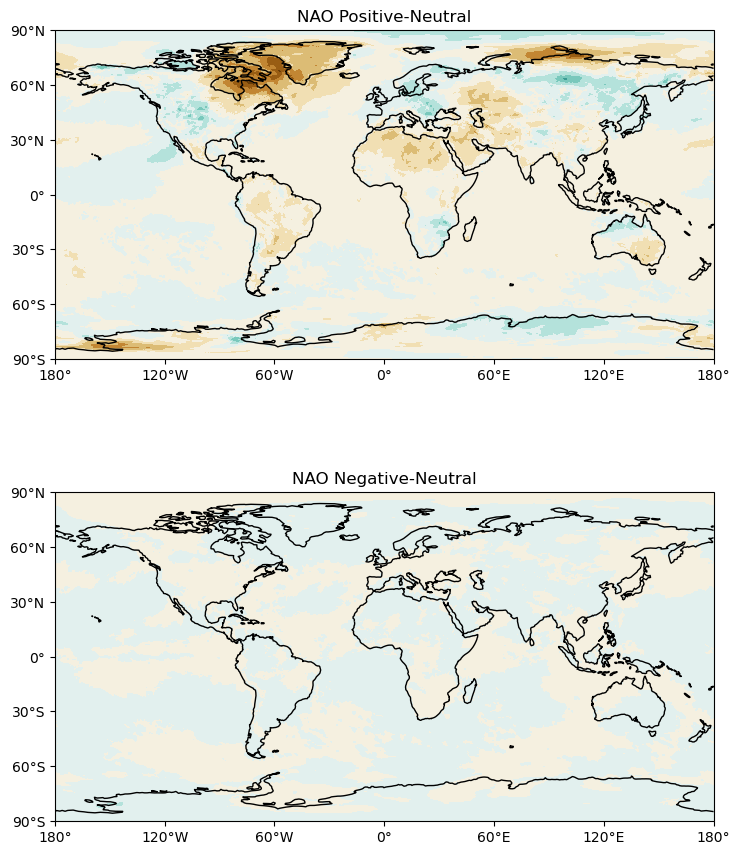

In [23]:
labels=['NAO Positive-Neutral','NAO Negative-Neutral']
clevs=np.arange(-3,3.5,0.5)

# Define the figure and each axis for the 3 rows and 3 columns
fig, axs = plt.subplots(nrows=2,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(8.5,11))

# axs is a 2 dimensional array of `GeoAxes`.  
# We will flatten it into a 1-D array
axs = axs.flatten()

#Loop over all of the seasons and plot
for i,nao in enumerate(diff_t2m):

        # Select the season
        data = diff_t2m[i]

        # Add the cyclic point
        data,lons = add_cyclic_point(data,coord=diff_t2m[i]['lon'])

        # Contour plot
        cs = axs[i].contourf(lons,diff_t2m[i]['lat'],data,clevs,
                          transform=ccrs.PlateCarree(),
                          cmap='BrBG',extend='both')
        
       # Longitude labels
        axs[i].set_xticks(np.arange(-180,181,60), crs=ccrs.PlateCarree())
        lon_formatter = cticker.LongitudeFormatter()
        axs[i].xaxis.set_major_formatter(lon_formatter)

        # Latitude labels
        axs[i].set_yticks(np.arange(-90,91,30), crs=ccrs.PlateCarree())
        lat_formatter = cticker.LatitudeFormatter()
        axs[i].yaxis.set_major_formatter(lat_formatter)

        
        # Title each subplot with the name of the season
        axs[i].set_title(labels[i])

        # Draw the coastines for each subplot
        axs[i].coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.25, 0.18, 0.5, 0.012])

# Draw the colorbar
cbar = fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='Kelvin')

# Add a big title at the top
plt.suptitle('Composite Maximum Daily Temperature Differences during NAO')

In [24]:
p = 0.05

In [25]:
nao_pos_t2m_vals = da_anoms_yearly.sel(year=nao_pos2.dropna(dim='Year')['Year'])
nao_neu_t2m_vals = da_anoms_yearly.sel(year=nao_neu2.dropna(dim='Year')['Year'])
nao_neg_t2m_vals = da_anoms_yearly.sel(year=nao_neg2.dropna(dim='Year')['Year'])

In [26]:
tstat,pval = ttest_ind(nao_pos_t2m_vals, 
                       nao_neu_t2m_vals,
                       equal_var = False)

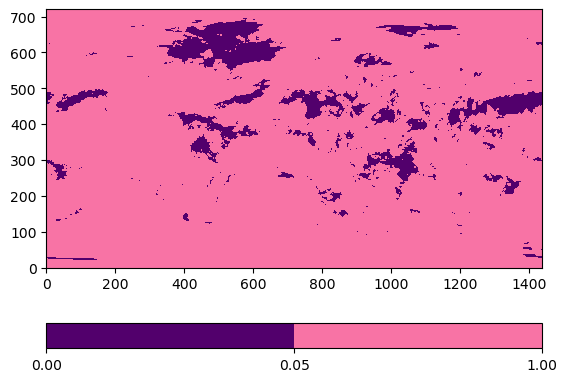

In [27]:
plt.contourf(pval,[0,0.05,1],cmap='RdPu_r') 
plt.colorbar(orientation='horizontal') ;

In [28]:
mask_diff = diff_t2m[0].where(pval <= p)
mask_diff

<xarray.DataArray 't2m' (lat: 721, lon: 1440)> Size: 4MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8

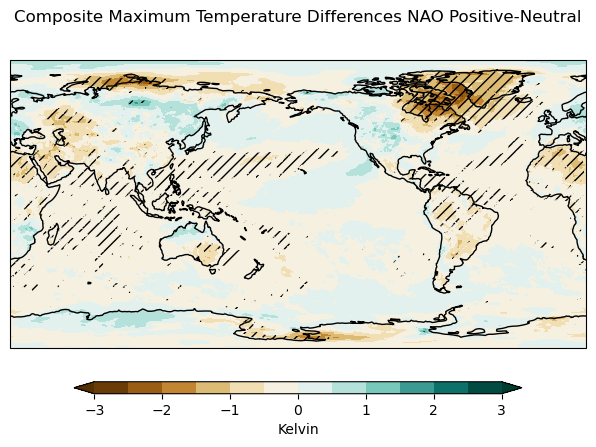

In [29]:
labels=['NAO Positive vs. Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)})


data=diff_t2m[0]

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_t2m[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff,coord=diff_t2m[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_t2m[0]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='BrBG',extend='both')

# Overlay of stippling
ss=axs.contourf(lons,diff_t2m[0]['lat'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['///',''],extend='both',alpha=0.0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Kelvin')

# Add a big title at the top
plt.suptitle('Composite Maximum Temperature Differences NAO Positive-Neutral')

plt.savefig('stats_ttest.png')

In [30]:
tstat2,pval2 = ttest_ind(nao_neg_t2m_vals, 
                       nao_neu_t2m_vals,
                       equal_var = False)

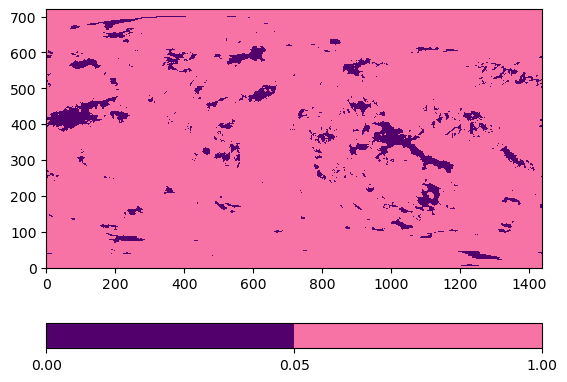

In [31]:
plt.contourf(pval2,[0,0.05,1],cmap='RdPu_r') 
plt.colorbar(orientation='horizontal') ;

In [36]:
mask_diff2 = diff_t2m[0].where(pval2 <= p)
mask_diff2

<xarray.DataArray 't2m' (lat: 721, lon: 1440)> Size: 4MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * lat      (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon      (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8

In [33]:
labels=['NAO Negative vs. Neutral']
clevs=np.arange(-3,3.5,0.5)
hatch_levs=[0]

# Define the figure and each axis for the 2 rows and 1 columns
fig, axs = plt.subplots(nrows=1,ncols=1,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=200.0)})


data=diff_t2m[0]

# Add the cyclic point
data,lons=add_cyclic_point(data,coord=diff_t2m[0]['lon'])
mask_data,lons=add_cyclic_point(mask_diff2,coord=diff_t2m[0]['lon'])

# Contour plot
cs=axs.contourf(lons,diff_t2m[0]['lat'],data,clevs,
                transform = ccrs.PlateCarree(),
                cmap='BrBG',extend='both')

# Overlay of stippling
ss=axs.contourf(lons,diff_t2m[0]['lat'],mask_data,[0,1],
                transform = ccrs.PlateCarree(),colors=['None'],
                hatches=['///',''],extend='both',alpha=0.0)

# Draw the coastines for each subplot
axs.coastlines()
        
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.1, hspace=0.5)

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.15, 0.18, 0.7, 0.025])

cbar = fig.colorbar(cs,cax=cbar_ax,orientation='horizontal',label='Kelvin')

# Add a big title at the top
plt.suptitle('Composite Maximum Temperature Differences NAO Negative-Neutral')

plt.savefig('stats_ttest.png')

TypeError: 'MultiPolygon' object is not subscriptable

Error in callback <function _draw_all_if_interactive at 0x7f2ebc532840> (for post_execute), with arguments args (),kwargs {}:


TypeError: 'MultiPolygon' object is not subscriptable

TypeError: 'MultiPolygon' object is not subscriptable

<Figure size 640x480 with 1 Axes>